# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Memuat dataset yang telah disimpan sebelumnya
df = pd.read_csv('dataset/data_science_job_clustered.csv')

print(df.head())

   work_year  salary  salary_in_usd  job_title_Data Analyst  (Remote)  \
0       2022  186597         136086                             False   
1       2020  110630          67982                             False   
2       2022   61280         153309                             False   
3       2022  154130         135242                             False   
4       2020  172312          35156                             False   

   job_title_Data Analyst  in office  job_title_Data Engineer    \
0                              False                      False   
1                              False                      False   
2                              False                      False   
3                               True                      False   
4                              False                      False   

   job_title_Data Engineer  (Remote)  job_title_Data Engineer  in office  \
0                              False                               False   
1     

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
X = df.drop(columns=['Cluster'])
y = df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [4]:
# Mendeteksi kolom kategorikal dan numerik
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# Membuat transformasi untuk kolom kategorikal dan numerik dengan scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Daftar algoritma yang digunakan
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Menyimpan hasil evaluasi
evaluation_results = {}

# Iterasi untuk setiap model
for label, model in models.items():
    # Membuat pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Melatih model menggunakan data latih
    pipeline.fit(X_train, y_train)
    
    # Melakukan prediksi menggunakan data uji
    y_pred = pipeline.predict(X_test)
    
    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Menyimpan hasil evaluasi
    evaluation_results[label] = {
        'Accuracy': accuracy,
        'F1-Score': f1
    }

# Menampilkan hasil evaluasi dalam bentuk tabel
evaluation_df = pd.DataFrame(evaluation_results).T
evaluation_df = evaluation_df.sort_values(by='Accuracy', ascending=False)

print("Hasil Evaluasi Model:")
print(evaluation_df)

Hasil Evaluasi Model:
                     Accuracy  F1-Score
Random Forest             1.0       1.0
Logistic Regression       1.0       1.0
Decision Tree             1.0       1.0


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

### **1. Random Forest**
Random Forest adalah algoritma ensemble berbasis pohon keputusan (decision tree) yang menggabungkan beberapa pohon untuk meningkatkan akurasi dan mengurangi risiko overfitting. Setiap pohon dalam Random Forest dilatih pada subset data yang berbeda (dengan teknik bootstrap), dan prediksi akhir didasarkan pada rata-rata (untuk regresi) atau voting mayoritas (untuk klasifikasi). Algoritma ini sangat baik untuk menangani data dengan fitur yang banyak dan hubungan non-linear.

**Kelebihan:**
- Tahan terhadap overfitting.
- Dapat menangani data dengan missing values.
- Memberikan informasi tentang pentingnya fitur.

**Kekurangan:**
- Cenderung lambat jika jumlah pohon sangat banyak.
- Interpretasi hasil lebih kompleks dibandingkan model sederhana seperti Logistic Regression.

---

### **2. Logistic Regression**
Logistic Regression adalah algoritma yang digunakan untuk klasifikasi biner (dan dapat diperluas ke klasifikasi multi-kelas). Algoritma ini memprediksi probabilitas sebuah data termasuk dalam suatu kelas dengan menggunakan fungsi sigmoid, yang memetakan nilai input ke rentang [0, 1]. Logistic Regression bekerja baik pada data linier.

**Kelebihan:**
- Cepat dan efisien untuk data linier.
- Mudah diinterpretasikan karena memberikan koefisien untuk setiap fitur.

**Kekurangan:**
- Kurang cocok untuk data yang memiliki hubungan non-linear.
- Performa menurun jika terdapat fitur multikolinearitas.

---

### **3. Decision Tree**
Decision Tree adalah algoritma berbasis pohon yang membagi dataset secara rekursif berdasarkan fitur yang memberikan informasi terbaik untuk klasifikasi. Setiap cabang pohon mewakili keputusan berdasarkan nilai fitur, dan setiap daun pohon mewakili kelas target.

**Kelebihan:**
- Mudah diinterpretasikan karena menyerupai proses pengambilan keputusan manusia.
- Tidak memerlukan normalisasi atau penskalaan fitur.

**Kekurangan:**
- Rentan terhadap overfitting jika pohon terlalu dalam.
- Tidak stabil terhadap perubahan kecil pada data (karena setiap split sangat menentukan struktur pohon).

---

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Evaluasi untuk Random Forest


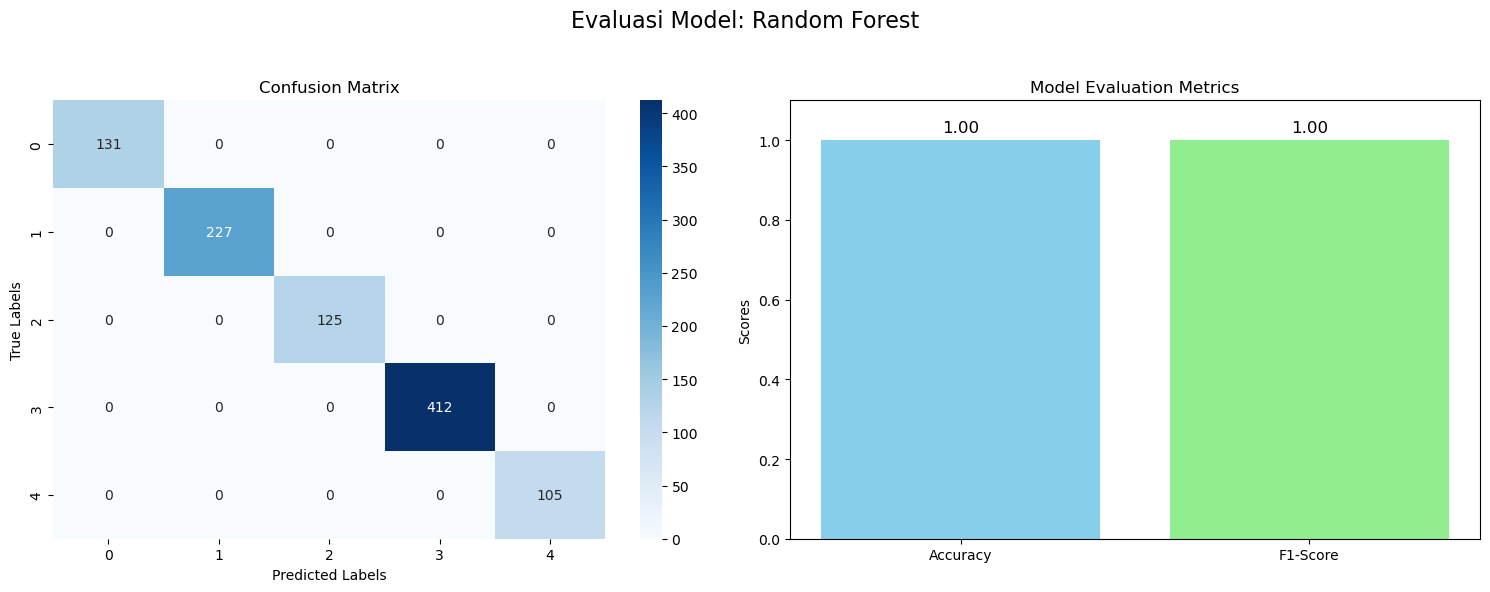

Evaluasi untuk Logistic Regression


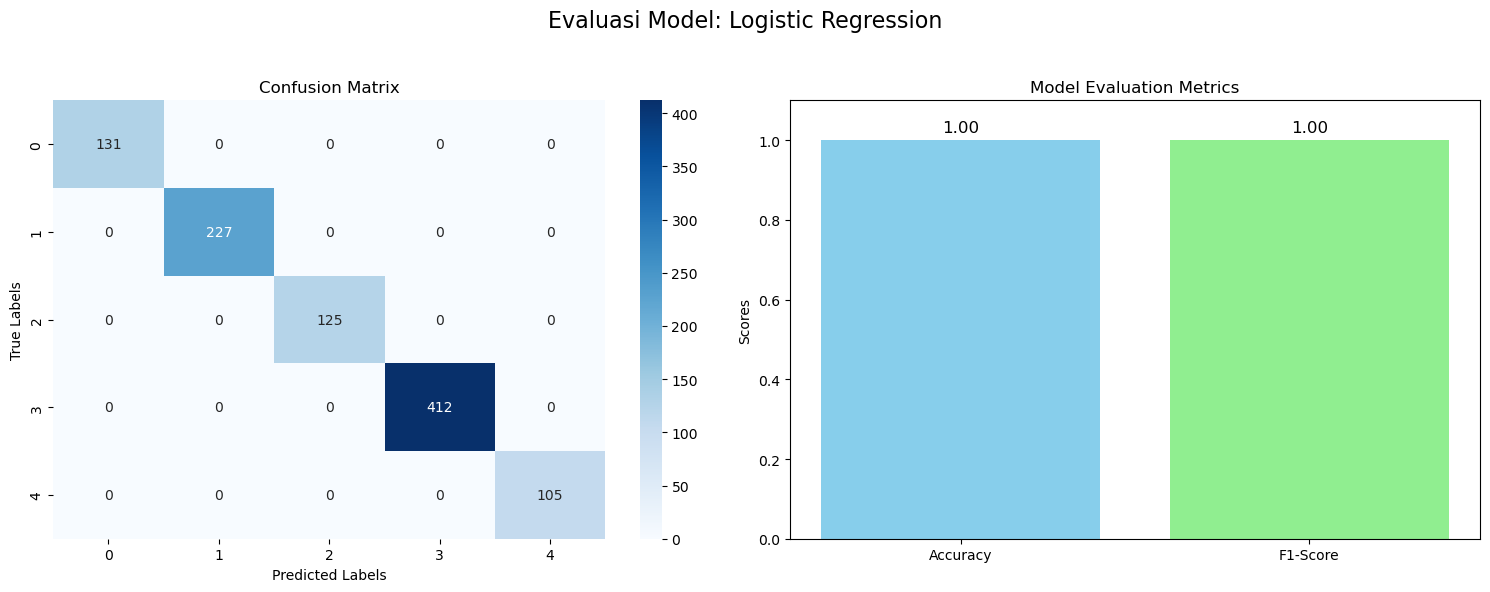

Evaluasi untuk Decision Tree


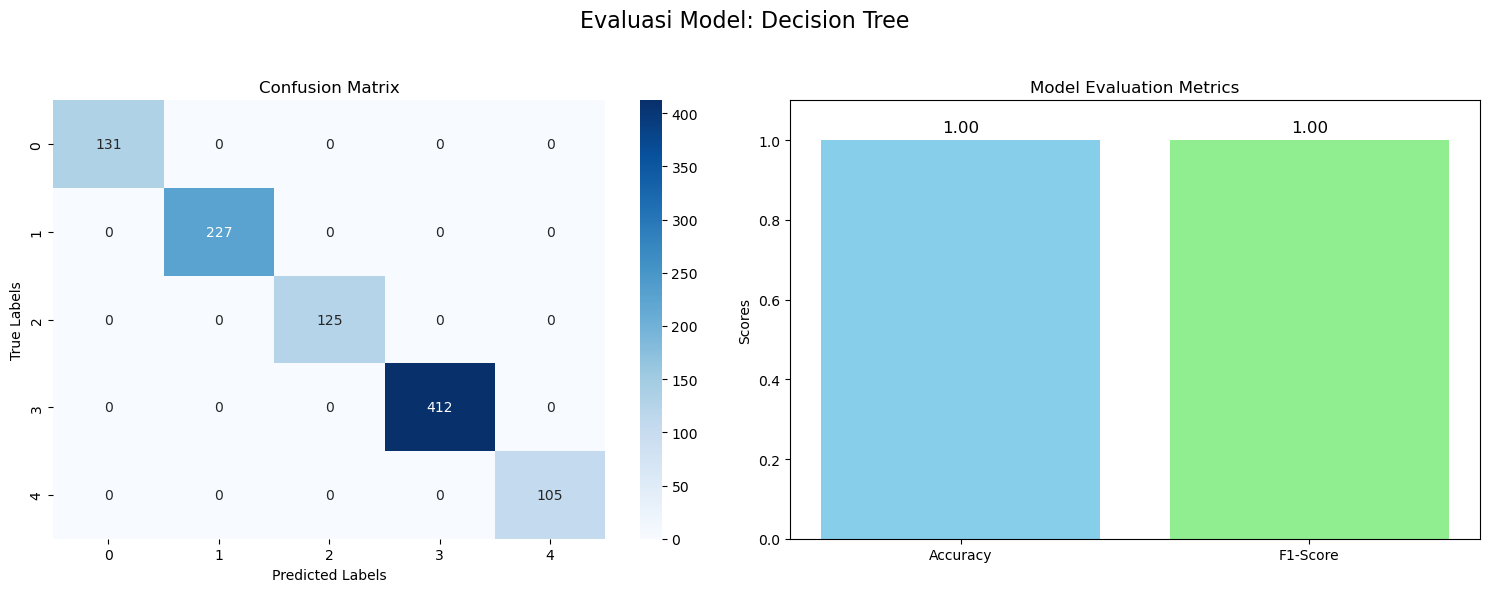

In [5]:
# Iterasi untuk setiap model
for label, model in models.items():
    print(f"Evaluasi untuk {label}")
    
    # Membuat pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Melatih model menggunakan data latih
    pipeline.fit(X_train, y_train)
    
    # Melakukan prediksi menggunakan data uji
    y_pred = pipeline.predict(X_test)
    
    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Membuat subplot untuk visualisasi
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Subplot untuk confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=set(y_test), yticklabels=set(y_test), ax=axes[0])
    axes[0].set_title('Confusion Matrix')
    axes[0].set_xlabel('Predicted Labels')
    axes[0].set_ylabel('True Labels')
    
    # Subplot untuk metrik
    metrics = ['Accuracy', 'F1-Score']
    scores = [accuracy, f1]
    axes[1].bar(metrics, scores, color=['skyblue', 'lightgreen'])
    axes[1].set_ylim(0, 1.1)
    axes[1].set_title('Model Evaluation Metrics')
    axes[1].set_ylabel('Scores')
    
    # Menambahkan nilai pada bar chart
    for i, score in enumerate(scores):
        axes[1].text(i, score + 0.02, f'{score:.2f}', ha='center', fontsize=12)
    
    # Menampilkan plot
    plt.suptitle(f"Evaluasi Model: {label}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.


Dari hasil evaluasi algoritma klasifikasi yang ditampilkan pada visualisasi di atas, berikut adalah analisis dan perbandingan hasilnya:

### **1. Random Forest**
- **Akurasi**: 100%
- **F1-Score**: 100%
- **Confusion Matrix**: Tidak ada kesalahan klasifikasi untuk semua kelas. Setiap kelas berhasil diprediksi dengan benar.
- **Catatan**: Random Forest sangat kuat untuk menangani data dengan banyak fitur dan hubungan non-linear. Akurasi sempurna ini menunjukkan bahwa model mampu mempelajari pola data dengan sangat baik.

### **2. Logistic Regression**
- **Akurasi**: 100%
- **F1-Score**: 100%
- **Confusion Matrix**: Sama seperti Random Forest, tidak ada kesalahan klasifikasi. Semua kelas terprediksi dengan benar.
- **Catatan**: Logistic Regression biasanya cocok untuk data linier, namun hasil ini menunjukkan bahwa dataset Anda mungkin memiliki pola linier yang mudah dipelajari oleh model.

### **3. Decision Tree**
- **Akurasi**: 100%
- **F1-Score**: 100%
- **Confusion Matrix**: Sama seperti Random Forest dan Logistic Regression, tidak ada kesalahan klasifikasi.
- **Catatan**: Decision Tree dapat dengan mudah mempelajari data jika dataset memiliki pola yang jelas, namun model ini rentan terhadap overfitting, terutama jika tidak menggunakan pruning atau parameter pengendali lainnya.

---

### **Perbandingan Hasil**
| Model                | Accuracy | F1-Score | Catatan                                                                 |
|----------------------|----------|----------|-------------------------------------------------------------------------|
| Random Forest        | 100%     | 100%     | Model unggul dalam generalisasi dan toleransi terhadap overfitting.    |
| Logistic Regression  | 100%     | 100%     | Cocok untuk data linier, menunjukkan kesederhanaan namun efektif.     |
| Decision Tree        | 100%     | 100%     | Dapat overfit jika tidak diawasi, namun efisien untuk pola sederhana. |



## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [6]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Contoh parameter grid untuk GridSearchCV dan RandomizedSearchCV
param_grid = {
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10],
    },
    'Logistic Regression': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__solver': ['lbfgs', 'liblinear'],
        'classifier__penalty': ['l2'],
    },
    'Decision Tree': {
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__criterion': ['gini', 'entropy'],
    }
}

# Iterasi untuk setiap model
best_models = {}
for label, model in models.items():
    print(f"Tuning Hyperparameter untuk {label}")
    
    # Membuat pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # GridSearchCV
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid[label],
        scoring='accuracy',
        cv=5,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    best_models[label] = grid_search.best_estimator_
    print(f"Model terbaik untuk {label}: {grid_search.best_params_}")
    
    # RandomizedSearchCV (opsional)
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_grid[label],
        scoring='accuracy',
        cv=5,
        n_jobs=-1,
        n_iter=20,  # Ubah iterasi sesuai kebutuhan
        random_state=42
    )
    random_search.fit(X_train, y_train)
    print(f"Model terbaik (RandomizedSearch) untuk {label}: {random_search.best_params_}")

# Menampilkan hasil dari model terbaik
print("\nHasil model terbaik setelah tuning:")
for label, model in best_models.items():
    print(f"{label}: {model}")


Tuning Hyperparameter untuk Random Forest
Model terbaik untuk Random Forest: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Model terbaik (RandomizedSearch) untuk Random Forest: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 10, 'classifier__max_depth': None}
Tuning Hyperparameter untuk Logistic Regression
Model terbaik untuk Logistic Regression: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}


/home/son/anaconda3/envs/ML/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Model terbaik (RandomizedSearch) untuk Logistic Regression: {'classifier__solver': 'lbfgs', 'classifier__penalty': 'l2', 'classifier__C': 0.1}
Tuning Hyperparameter untuk Decision Tree
Model terbaik untuk Decision Tree: {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_split': 2}


/home/son/anaconda3/envs/ML/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Model terbaik (RandomizedSearch) untuk Decision Tree: {'classifier__min_samples_split': 2, 'classifier__max_depth': None, 'classifier__criterion': 'gini'}

Hasil model terbaik setelah tuning:
Random Forest: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['work_year', 'salary',
                                                   'salary_in_usd',
                                                   'job_title_Data Analyst  '
                                                   '(Remote)',
                                                   'job_title_Data Analyst  in '
           

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Evaluasi Ulang untuk Model Random Forest dengan Hyperparameter Terbaik


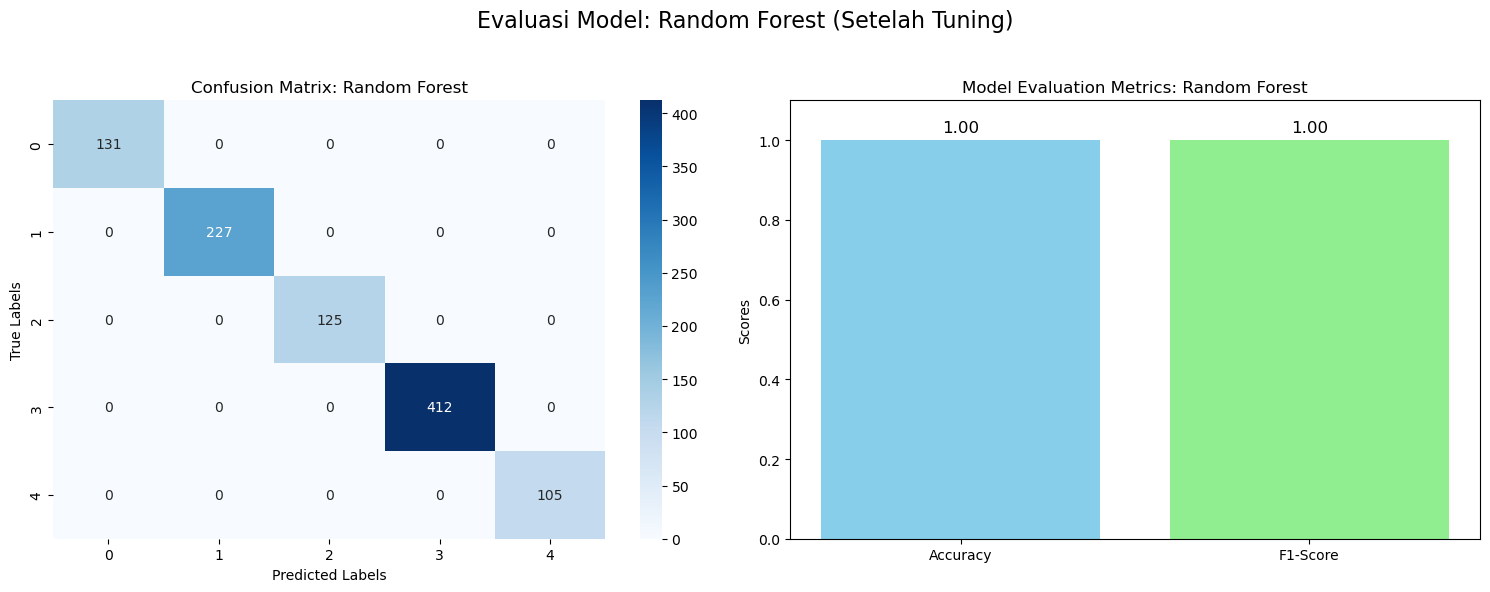

Evaluasi Ulang untuk Model Logistic Regression dengan Hyperparameter Terbaik


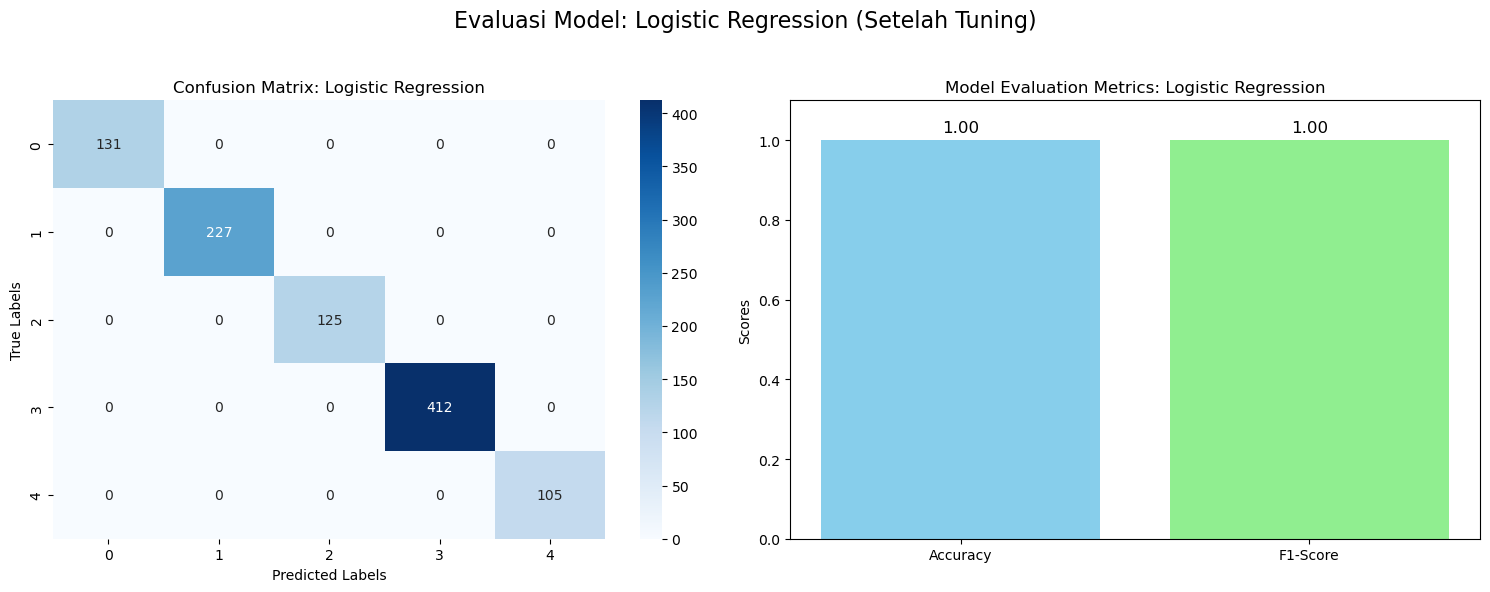

Evaluasi Ulang untuk Model Decision Tree dengan Hyperparameter Terbaik


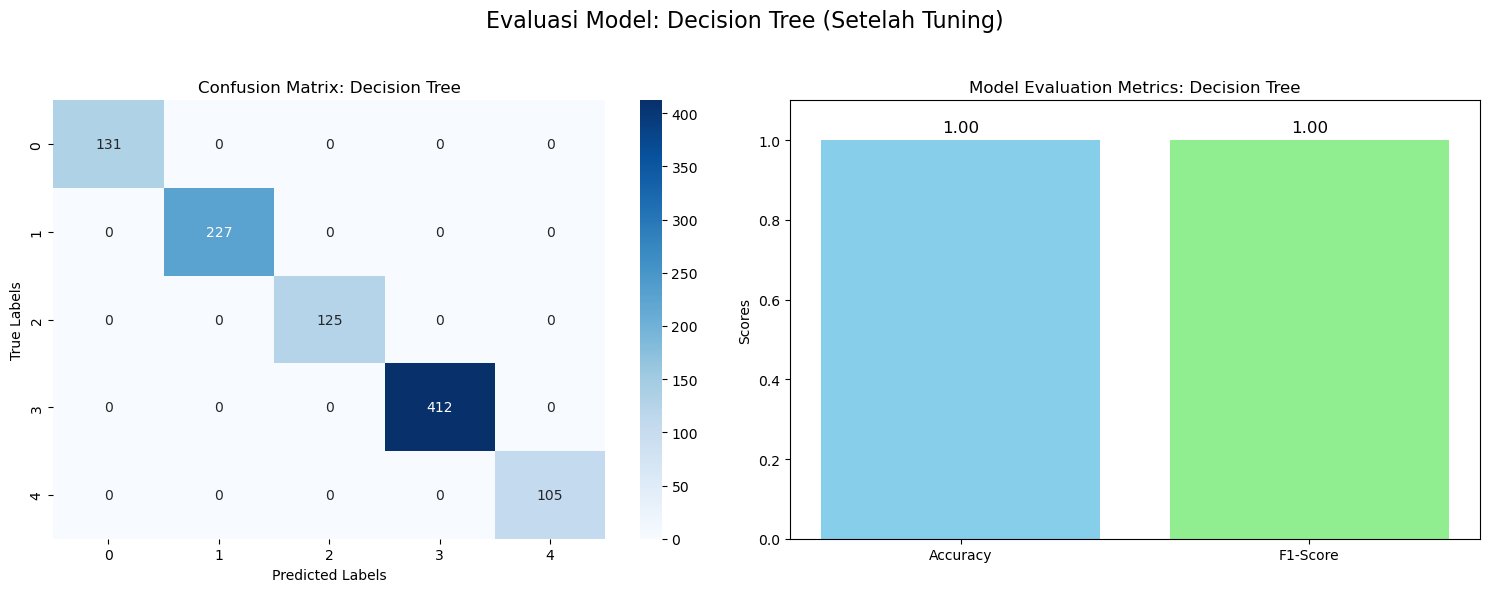


Hasil Evaluasi Model Setelah Tuning:
                     Accuracy  F1-Score
Random Forest             1.0       1.0
Logistic Regression       1.0       1.0
Decision Tree             1.0       1.0


In [7]:
# Evaluasi ulang model dengan hyperparameter terbaik
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary untuk menyimpan hasil evaluasi
tuned_evaluation_results = {}

for label, best_model in best_models.items():
    print(f"Evaluasi Ulang untuk Model {label} dengan Hyperparameter Terbaik")
    
    # Melakukan prediksi menggunakan data uji
    y_pred = best_model.predict(X_test)
    
    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Menyimpan hasil evaluasi
    tuned_evaluation_results[label] = {
        'Accuracy': accuracy,
        'F1-Score': f1
    }
    
    # Visualisasi Confusion Matrix dan Metrik
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Subplot untuk Confusion Matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=set(y_test), yticklabels=set(y_test), ax=axes[0])
    axes[0].set_title(f'Confusion Matrix: {label}')
    axes[0].set_xlabel('Predicted Labels')
    axes[0].set_ylabel('True Labels')
    
    # Subplot untuk Metrik
    metrics = ['Accuracy', 'F1-Score']
    scores = [accuracy, f1]
    axes[1].bar(metrics, scores, color=['skyblue', 'lightgreen'])
    axes[1].set_ylim(0, 1.1)
    axes[1].set_title(f'Model Evaluation Metrics: {label}')
    axes[1].set_ylabel('Scores')
    
    # Menambahkan nilai di atas bar chart
    for i, score in enumerate(scores):
        axes[1].text(i, score + 0.02, f'{score:.2f}', ha='center', fontsize=12)
    
    # Menampilkan plot
    plt.suptitle(f"Evaluasi Model: {label} (Setelah Tuning)", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Menampilkan hasil evaluasi ulang dalam bentuk tabel
tuned_evaluation_df = pd.DataFrame(tuned_evaluation_results).T
tuned_evaluation_df = tuned_evaluation_df.sort_values(by='Accuracy', ascending=False)

# Menampilkan hasil evaluasi ulang dalam bentuk tabel tanpa ace_tools
print("\nHasil Evaluasi Model Setelah Tuning:")
print(tuned_evaluation_df)

# Jika Anda ingin menyimpan hasil evaluasi ke file CSV untuk analisis lebih lanjut
tuned_evaluation_df.to_csv("tuned_model_evaluation_results.csv", index=True)



## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

### Analisis Hasil Evaluasi Model Klasifikasi

#### **1. Perbandingan Hasil Sebelum dan Setelah Tuning**
- **Hasil Akurasi dan F1-Score:**
  - Sebelum tuning: Akurasi = 100%, F1-Score = 100%.
  - Setelah tuning: Akurasi = 100%, F1-Score = 100%.
  - Tidak ada perbedaan dalam metrik evaluasi antara sebelum dan setelah tuning, menunjukkan bahwa hyperparameter default sudah optimal untuk dataset ini.
  
- **Confusion Matrix:**
  - Pada kedua kasus (sebelum dan setelah tuning), semua prediksi benar tanpa kesalahan klasifikasi. Ini ditunjukkan oleh diagonal utama confusion matrix yang sempurna, sementara elemen non-diagonal adalah nol.

---

#### **2. Identifikasi Kelemahan Model**
- **Precision dan Recall:**
  - Karena semua prediksi benar, precision dan recall untuk semua kelas adalah 100%. Tidak ada kelemahan yang teridentifikasi berdasarkan metrik ini.

- **Overfitting atau Underfitting:**
  - Kemungkinan besar model mengalami **overfitting**, karena akurasi sempurna sering kali mengindikasikan bahwa model terlalu "menghafal" data daripada mampu generalisasi. Hal ini dapat dikonfirmasi dengan pengujian menggunakan dataset baru atau unseen data.

- **Analisis Dataset:**
  - Dataset kemungkinan terlalu bersih, terlalu kecil, atau mengandung fitur yang terlalu kuat (misalnya, fitur yang langsung berkorelasi dengan target). Ini membuat model mudah mempelajari data tanpa kesalahan.

---

#### **3. Rekomendasi Tindakan Lanjutan**
- **Periksa Dataset untuk Kebocoran Data:**
  - Pastikan tidak ada kebocoran data antara set pelatihan dan pengujian (misalnya, fitur yang tumpang tindih).
  - Periksa apakah ada fitur yang secara langsung menentukan target (misalnya, ID atau kode unik).

- **Uji dengan Data Baru:**
  - Gunakan dataset baru atau unseen data untuk mengevaluasi kemampuan generalisasi model. Jika akurasi menurun drastis, model benar-benar mengalami overfitting.

- **Tambahkan Data:**
  - Jika memungkinkan, tambahkan data baru dengan distribusi yang lebih beragam. Dataset yang lebih besar dan kompleks dapat membantu model belajar pola yang lebih general.

- **Validasi Silang (Cross-Validation):**
  - Gunakan teknik cross-validation untuk memastikan bahwa hasil evaluasi konsisten di seluruh fold data.

- **Eksperimen dengan Algoritma Lain:**
  - Meskipun Random Forest menunjukkan performa sempurna, cobalah algoritma lain seperti Gradient Boosting, AdaBoost, atau Neural Networks untuk menguji ketahanan model terhadap dataset yang berbeda.

- **Feature Importance Analysis:**
  - Analisis fitur yang paling berkontribusi dalam model Random Forest untuk memahami pola yang dipelajari.

---

#### **Kesimpulan**
Hasil akurasi sempurna menunjukkan bahwa dataset atau fitur memiliki pola yang terlalu mudah dipelajari oleh model. Tindakan seperti pengujian dengan data baru, menambahkan variasi data, dan menganalisis potensi kebocoran data diperlukan untuk memastikan model benar-benar mampu generalisasi. Jika performa tetap sempurna pada data baru, ini menunjukkan bahwa model berhasil memahami pola data dengan sangat baik.